# List experimental parameters

Go to [Index](response_Witz2019_index.ipynb).

Here we read the experimental parameters computed for data sets of Witz et al (2019) and Si & Le Treut et al (2019), Sauls et al (2020) and Le Treut & Si & Li (2020). The experimental files for Jun lab were created in the notebook [response_Witz2019_import_junlab_data](response_Witz2019_import_junlab_data.ipynb). We also generate the predicted adder plot given the experimental values of $\sigma_{id}/\sigma_{ii}$.

## Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import matplotlib.ticker
plt.rcParams['svg.fonttype'] = 'none'   # to export text as text, not curves

sys.path.append(os.path.join('code'))
from functions_response import get_mean_std_logn

## Load and print experimental parameters

In [3]:
alldicts = {}
# Parameter files for Witz et al
paramsdict = {'glycerol': '20180706_GW296_glycerol37_1_MMStack', \
             'glucose': '20180711_GW296_glucose37_1_MMStack', \
             'glucose8aa': '20180709_GW296_glucose8aa37_1_MMStack', \
             'glycerolauto': '20170327_GW339_temp' \
            }
for name in paramsdict.keys():
    dirname = paramsdict[name]
    paramfile = os.path.join('..', 'PreProcessed', dirname, 'simul_params.pkl')
    paramsdict[name] = paramfile
    
alldicts['GW'] = paramsdict

# Parameter files for Si & Le Treut et al
names = ['mg1655_acetate', \
         'mg1655_glucose', \
         'mg1655_glycerol11aa', \
         'ncm3722_arginine', \
         'ncm3722_glucose', \
         'ncm3722_glucose12aa' \
        ]
paramsdict = {}
for name in names:
    paramsdict[name] = os.path.join('experiments', name, 'simul_params.pkl')
alldicts['FSGLT'] = paramsdict

# Parameter files for Le Treut & Si & Li et al
names = [
        'mg1655_acetate_uracil' , \
        'mg1655_glycerol6aa_uracil', \
        'mg1655_glucose_uracil', \
        ]
paramsdict = {}
for name in names:
    paramsdict[name] = os.path.join('experiments', name, 'simul_params.pkl')
alldicts['GLTFSDL'] = paramsdict

# Parameter files for Sauls et al
names = ['3610_gly', \
         '3610_man', \
         '3610_suc', \
        ]
paramsdict = {}
for name in names:
    paramsdict[name] = os.path.join('experiments', name, 'simul_params.pkl')
alldicts['JTS'] = paramsdict

In [4]:
labels = {}
ratios = {}

for key in alldicts.keys():
    print('-'*38)
    print('|{:<10s}{:s} experiments'.format("", key))
    print('-'*38)
    
    paramdict = alldicts[key]
    names = list(paramdict.keys())
    nfiles = len(names)
    ratios[key] = []
    labels[key] = []
    
    np.random.seed(123)
    for ind in range(nfiles):
        name = names[ind]
        paramfile = paramdict[name]
        print(paramfile)

        with open(paramfile, 'rb') as f:
            exp_params = pickle.load(f)

        params = {'tau_logn_mu' : exp_params['fit_logtau'][1], \
                  'tau_logn_sigma' : exp_params['fit_logtau'][2], \
                  'tau_corr': exp_params['tau_corr'][0], \
                  'DLi_mu': exp_params['fit_DLi'][1], \
                  'DLi_sigma': exp_params['fit_DLi'][2], \
                  'DLdLi_logn_mu': exp_params['fit_logDLdLi'][1], \
                  'DLdLi_logn_sigma': exp_params['fit_logDLdLi'][2], \
                  'Lb_logn_mu': exp_params['fit_logLb'][1], \
                  'Lb_logn_sigma':exp_params['fit_logLb'][2], \
                  'dL_mu': exp_params['fit_dL'][1], \
                  'dL_sigma': exp_params['fit_dL'][2], \
                  'div_ratio': exp_params['divR_std'] \
                 }

        # plot the statistics per experiment
        print(name)
        ## Fitted generation time
        mu = params['tau_logn_mu']
        std = params['tau_logn_sigma']
        m, s = get_mean_std_logn(mu, std)
        print("Fitted generation time: ")
        print("{:2s}mean = {:.4f}    std = {:.4f}    CV = {:.0f} %".format("",m, s, s/m*100))
        ## division
        print("Septum positioning")
        m = 0.5
        std = params['div_ratio']
        s = np.nanstd(1./(1.+np.random.normal(1, std, 1000)))
        print("{:2s}mean = {:.4f}    std = {:.4f}    CV = {:.0f} %".format("",m, s, s/m*100))
        ## initiation adder
        print("initiation adder: ")
        m_ii = params['DLi_mu']
        s_ii = params['DLi_sigma']
        print("{:2s}mu_ii = {:.4f}    s_ii = {:.4f}    CV = {:.0f} %".format("",m_ii, s_ii, s_ii/m_ii*100))
        ## division adder
        print("division adder: ")
        mu = params['DLdLi_logn_mu']
        std = params['DLdLi_logn_sigma']
        m_id, s_id = get_mean_std_logn(mu, std)
        print("{:2s}mu_id = {:.4f}    s_id = {:.4f}    CV = {:.0f} %".format("",m_id, s_id, s_id/m_id*100))
        print("{:2s}rho_d = {:.4f}".format("",0.5/(1.+3 * (s_id/s_ii)**2)))
        print("Ratio of adders' standard deviations:")
        print("{:2s}s_id / s_ii = {:.4f}".format("",s_id/s_ii))
        print("-"*10)
        
        # save the ratio
        labels[key].append(name)
        ratios[key].append(s_id/s_ii)
    

--------------------------------------
|          GW experiments
--------------------------------------
../PreProcessed/20180706_GW296_glycerol37_1_MMStack/simul_params.pkl
glycerol
Fitted generation time: 
  mean = 90.8851    std = 15.4218    CV = 17 %
Septum positioning
  mean = 0.5000    std = 0.0544    CV = 11 %
initiation adder: 
  mu_ii = 0.9547    s_ii = 0.2281    CV = 24 %
division adder: 
  mu_id = 0.7316    s_id = 0.1115    CV = 15 %
  rho_d = 0.2913
Ratio of adders' standard deviations:
  s_id / s_ii = 0.4888
----------
../PreProcessed/20180711_GW296_glucose37_1_MMStack/simul_params.pkl
glucose
Fitted generation time: 
  mean = 53.7505    std = 8.3245    CV = 15 %
Septum positioning
  mean = 0.5000    std = 0.0481    CV = 10 %
initiation adder: 
  mu_ii = 0.7333    s_ii = 0.1882    CV = 26 %
division adder: 
  mu_id = 1.0193    s_id = 0.2147    CV = 21 %
  rho_d = 0.1019
Ratio of adders' standard deviations:
  s_id / s_ii = 1.1410
----------
../PreProcessed/20180709_GW296_gl

## Draw predicted adder plots

Experiments from GW in darkblue, range is 0.49-1.31
Experiments from FSGLT in darkgreen, range is 0.64-2.68
Experiments from GLTFSDL in darkred, range is 0.90-1.84
Experiments from JTS in gold, range is 2.66-5.14
Saved figures/miscellaneous/adder_plots_predicted.png
Saved figures/miscellaneous/adder_plots_predicted.svg


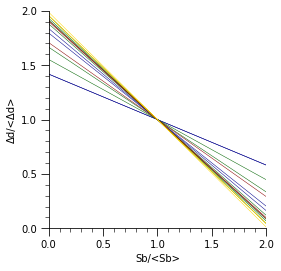

In [5]:
# make figure
figsize=(4,4)
fig = plt.figure(num='none', facecolor='w',figsize=figsize)
ax = fig.gca()
ax.tick_params(bottom=True, left=True, labelbottom=True, labelleft=True)
ax.tick_params(axis='both', which='major', length=8)
ax.tick_params(axis='both', which='minor', length=4)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['left'].set_smart_bounds(True)
# ax.spines['bottom'].set_smart_bounds(True)
ax.set_aspect('equal')
ax.set_xlim(0.,2)
ax.set_ylim(0.,2)
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.5))
ax.yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
ax.set_xlabel("Sb/<Sb>")
ax.set_ylabel("Δd/<Δd>")

func = lambda u: 0.5/(1.+3*u**2)
colors = iter(['darkblue', 'darkgreen', 'darkred', 'gold'])
for key in ratios.keys():
    color=next(colors)
    print("Experiments from {:s} in {:s}, range is {:.2f}-{:.2f}".format(key, color,np.min(ratios[key]),np.max(ratios[key])))
    for r in ratios[key]:
        rho = func(r)
        a = 2*rho - 1
        b = 2*(1.-rho)

        yinter = b
        xinter = -b/a
        X = [0., xinter]
        Y = [yinter,0]
        ax.plot(X,Y,'k-',lw=0.5, color=color)

# save figure
outputdir = os.path.join('figures','miscellaneous')
if not os.path.isdir(outputdir):
    os.makedirs(outputdir)
fpath = os.path.join(outputdir,'adder_plots_predicted')
for ext in ['.png', '.svg']:
    fig.savefig(fpath+ext, dpi=300, bbox_inches='tight', pad_inches=0)
    print("Saved {:s}".format(fpath+ext))